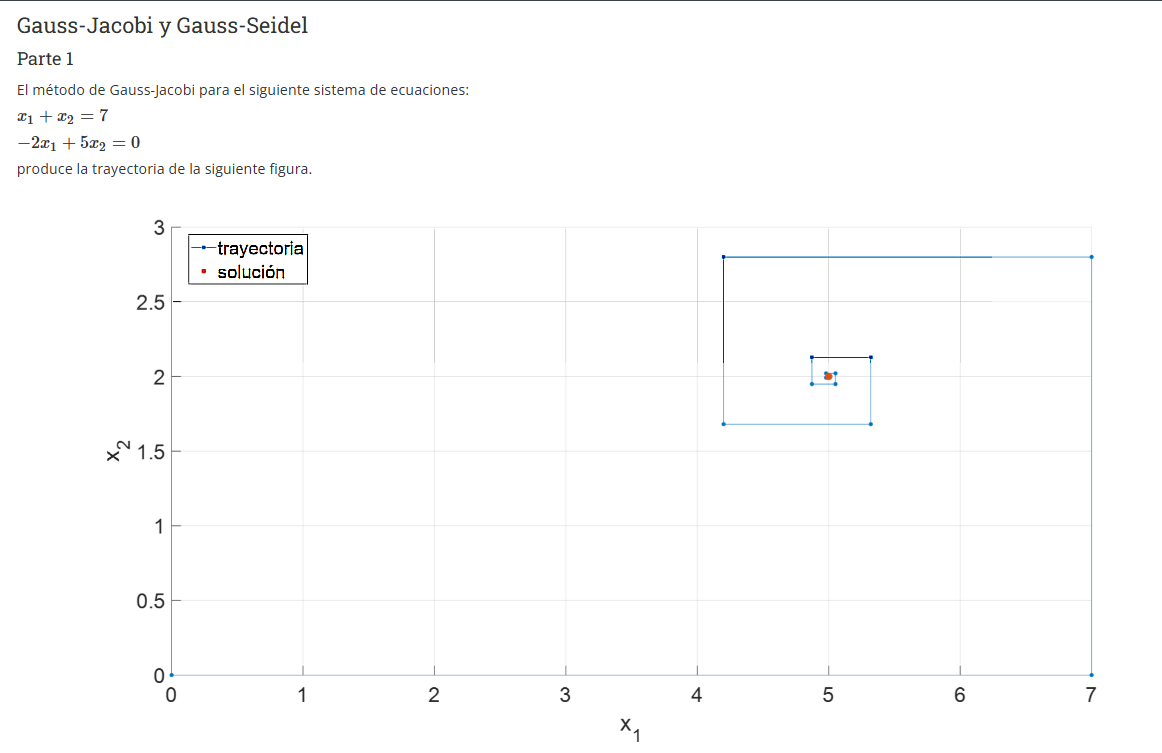

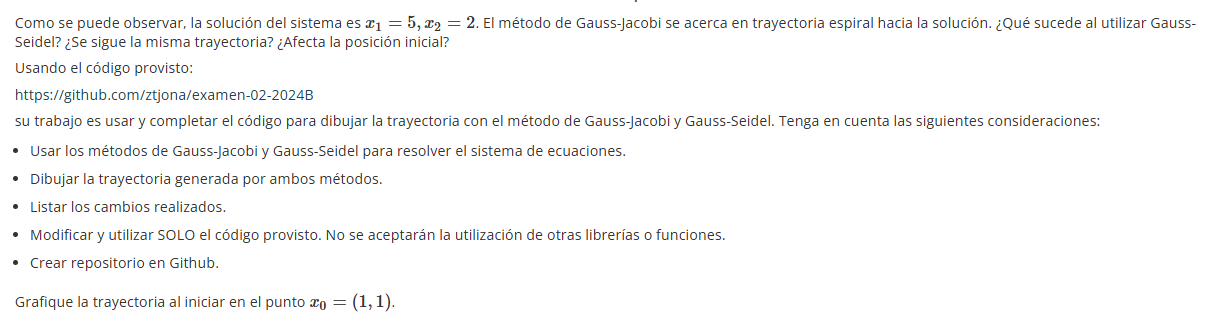

In [24]:
%load_ext autoreload
# %autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [25]:
import logging
from sys import stdout
from datetime import datetime
import numpy as np
import os

logging.basicConfig(
    level=logging.INFO,
    format="[%(asctime)s][%(levelname)s] %(message)s",
    stream=stdout,
    datefmt="%m-%d %H:%M:%S",
)

logging.info(f"{os.getlogin()}| {datetime.now()}")

[08-19 10:51:28][INFO] DELL| 2025-08-19 10:51:28.065298


In [26]:

import matplotlib.pyplot as plt
from iterative_methods import gauss_jacobi, gauss_seidel


In [ ]:
def track_trajectory(method_func, A, b, x0, tol, max_iter):
    """
    Función wrapper para trackear la trayectoria del método iterativo
    """
    # Hacemos una copia para no modificar el original
    A = A.copy()
    b = b.copy()
    x0 = x0.copy()
    
    # Lista para almacenar la trayectoria
    trajectory = [x0.copy()]
    
    # Función temporal que registra cada iteración
    def logged_method(A, b, x0, tol, max_iter):
        n = A.shape[0]
        x = x0.copy()
        
        for k in range(1, max_iter):
            x_new = np.zeros((n, 1))
            for i in range(n):
                if method_func.__name__ == 'gauss_jacobi':
                    suma = sum([A[i, j] * x[j] for j in range(n) if j != i])
                else:  # gauss_seidel
                    suma1 = sum([A[i, j] * x_new[j] for j in range(i)])
                    suma2 = sum([A[i, j] * x[j] for j in range(i + 1, n)])
                    suma = suma1 + suma2
                
                x_new[i] = (b[i] - suma) / A[i, i]
            
            trajectory.append(x_new.copy())
            
            if np.linalg.norm(x_new - x) < tol:
                return x_new, trajectory
                
            x = x_new.copy()
        
        return x, trajectory
    
    # Ejecutar el método con tracking
    solution, full_trajectory = logged_method(A, b, x0, tol, max_iter)
    return np.array(full_trajectory).squeeze(), solution

In [28]:
# Sistema de ecuaciones: x1 + x2 = 7, -2x1 + 5x2 = 0
A = np.array([[1, 1], 
              [-2, 5]], dtype=float)

b = np.array([7, 0], dtype=float).reshape(-1, 1)

# Punto inicial x0 = (1, 1)
x0 = np.array([1, 1], dtype=float).reshape(-1, 1)

# Parámetros de iteración
tol = 1e-6
max_iter = 50

In [29]:
# Obtener trayectorias usando las funciones importadas
trajectory_jacobi, sol_jacobi = track_trajectory(gauss_jacobi, A, b, x0, tol, max_iter)
trajectory_seidel, sol_seidel = track_trajectory(gauss_seidel, A, b, x0, tol, max_iter)

print("Solución Gauss-Jacobi:", sol_jacobi.flatten())
print("Solución Gauss-Seidel:", sol_seidel.flatten())

Solución Gauss-Jacobi: [5.00000069 2.00000017]
Solución Gauss-Seidel: [4.99999983 1.99999993]


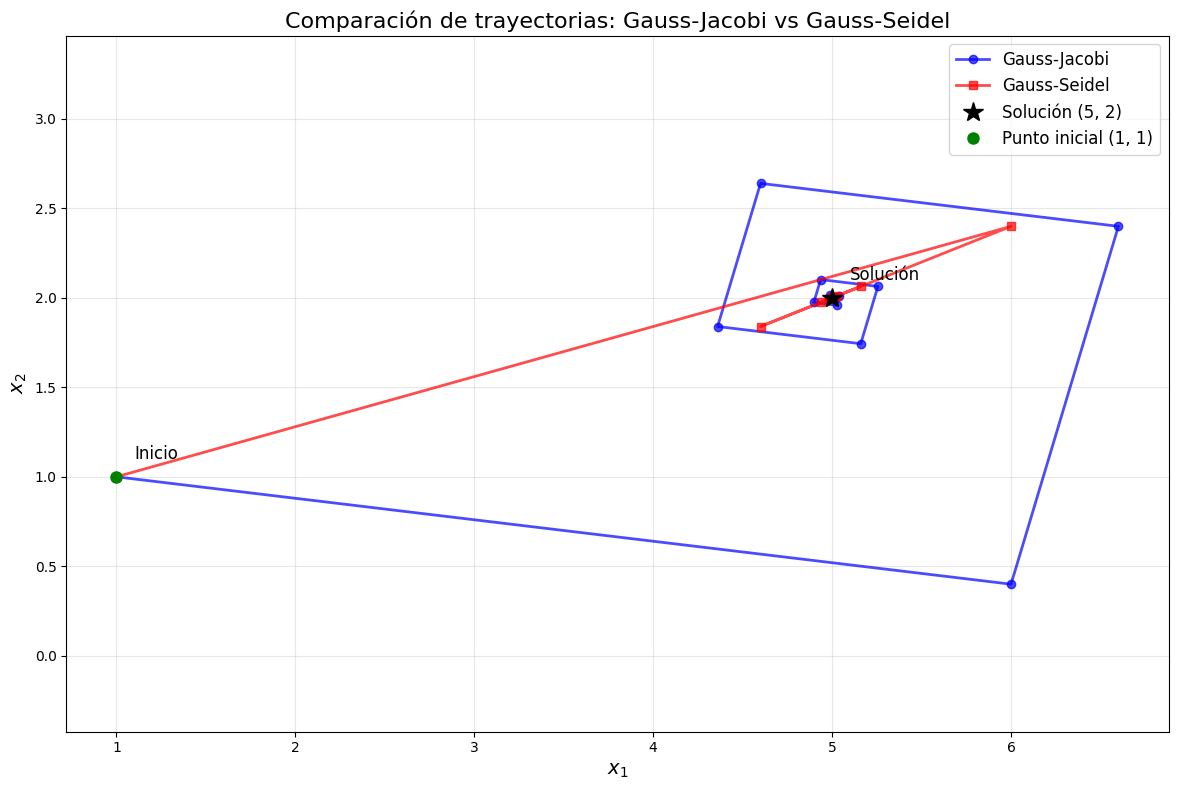

In [30]:
# Crear figura
plt.figure(figsize=(12, 8))

# Trayectoria Gauss-Jacobi
plt.plot(trajectory_jacobi[:, 0], trajectory_jacobi[:, 1], 
         'o-', linewidth=2, markersize=6, label='Gauss-Jacobi', color='blue', alpha=0.7)

# Trayectoria Gauss-Seidel
plt.plot(trajectory_seidel[:, 0], trajectory_seidel[:, 1], 
         's-', linewidth=2, markersize=6, label='Gauss-Seidel', color='red', alpha=0.7)

# Punto solución
plt.plot(5, 2, 'k*', markersize=15, label='Solución (5, 2)')

# Punto inicial
plt.plot(x0[0], x0[1], 'go', markersize=8, label='Punto inicial (1, 1)')

# Configuración del gráfico
plt.xlabel('$x_1$', fontsize=14)
plt.ylabel('$x_2$', fontsize=14)
plt.title('Comparación de trayectorias: Gauss-Jacobi vs Gauss-Seidel', fontsize=16)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=12)
plt.axis('equal')

# Anotaciones
plt.text(5.1, 2.1, 'Solución', fontsize=12)
plt.text(1.1, 1.1, 'Inicio', fontsize=12)

plt.tight_layout()
plt.show()

In [37]:

print(f"Gauss-Jacobi: {len(trajectory_jacobi)} iteraciones")
print(f"Gauss-Seidel: {len(trajectory_seidel)} iteraciones")
print(f"Solución exacta: [5, 2]")
print(f"Solución Jacobi: {sol_jacobi.flatten()}")
print(f"Solución Seidel: {sol_seidel.flatten()}")

Gauss-Jacobi: 35 iteraciones
Gauss-Seidel: 19 iteraciones
Solución exacta: [5, 2]
Solución Jacobi: [5.00000069 2.00000017]
Solución Seidel: [4.99999983 1.99999993]


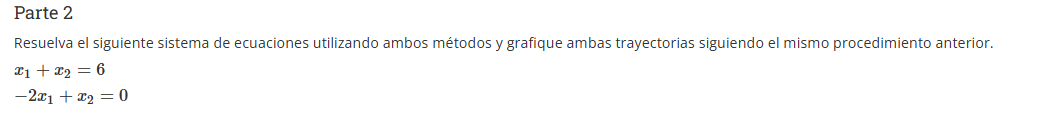

In [38]:
# Resolver el sistema: x1 + x2 = 6, -2x1 + x2 = 0
A = np.array([[1, 1], 
              [-2, 1]], dtype=float)

b = np.array([6, 0], dtype=float).reshape(-1, 1)

# Punto inicial (puedes usar el mismo o cambiar)
x0 = np.array([1, 1], dtype=float).reshape(-1, 1)

# Parámetros de iteración
tol = 1e-6
max_iter = 50


In [39]:
# Obtener trayectorias para el nuevo sistema
trajectory_jacobi2, sol_jacobi2 = track_trajectory(gauss_jacobi, A, b, x0, tol, max_iter)
trajectory_seidel2, sol_seidel2 = track_trajectory(gauss_seidel, A, b, x0, tol, max_iter)

print("Solución Gauss-Jacobi:", sol_jacobi2.flatten())
print("Solución Gauss-Seidel:", sol_seidel2.flatten())

Solución Gauss-Jacobi: [ 50331650. -33554428.]
Solución Gauss-Seidel: [8.44424930e+14 1.68884986e+15]



Determinante de A: 2.9999999999999996
Solución exacta: [2. 4.]


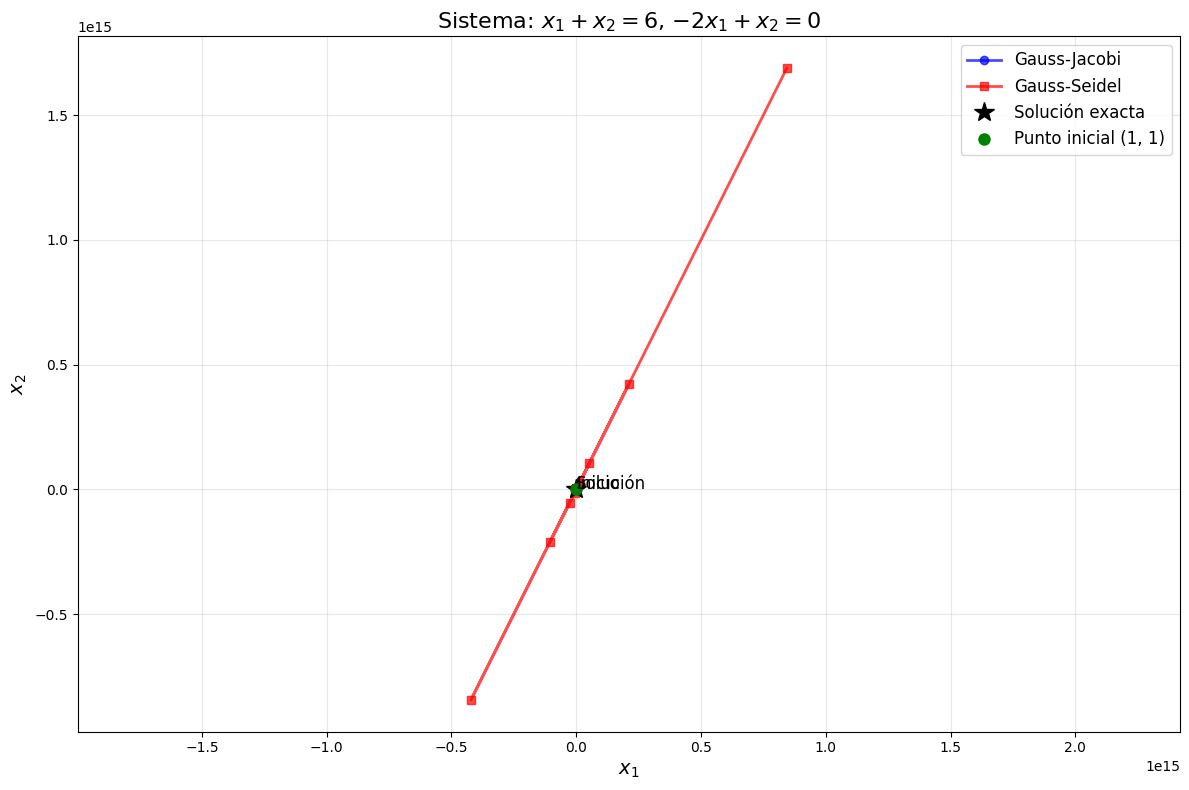

In [41]:
# Verificar si el sistema tiene solución única
det_A = np.linalg.det(A)
print(f"\nDeterminante de A: {det_A}")

if det_A != 0:
    sol_exacta = np.linalg.solve(A, b)
    print(f"Solución exacta: {sol_exacta.flatten()}")
else:
    print("El sistema no tiene solución única")

# Crear figura para el nuevo sistema
plt.figure(figsize=(12, 8))

# Trayectoria Gauss-Jacobi
plt.plot(trajectory_jacobi2[:, 0], trajectory_jacobi2[:, 1], 
         'o-', linewidth=2, markersize=6, label='Gauss-Jacobi', color='blue', alpha=0.7)

# Trayectoria Gauss-Seidel
plt.plot(trajectory_seidel2[:, 0], trajectory_seidel2[:, 1], 
         's-', linewidth=2, markersize=6, label='Gauss-Seidel', color='red', alpha=0.7)

# Punto solución (si existe)
if det_A != 0:
    plt.plot(sol_exacta[0], sol_exacta[1], 'k*', markersize=15, label='Solución exacta')

# Punto inicial
plt.plot(x0[0], x0[1], 'go', markersize=8, label='Punto inicial (1, 1)')

# Configuración del gráfico
plt.xlabel('$x_1$', fontsize=14)
plt.ylabel('$x_2$', fontsize=14)
plt.title('Sistema: $x_1 + x_2 = 6$, $-2x_1 + x_2 = 0$', fontsize=16)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=12)
plt.axis('equal')

# Anotaciones
plt.text(x0[0] + 0.1, x0[1] + 0.1, 'Inicio', fontsize=12)
if det_A != 0:
    plt.text(sol_exacta[0] + 0.1, sol_exacta[1] + 0.1, 'Solución', fontsize=12)

plt.tight_layout()
plt.show()

In [46]:

print(f"Gauss-Jacobi: {len(trajectory_jacobi2)} iteraciones")
print(f"Gauss-Seidel: {len(trajectory_seidel2)} iteraciones")
print(f"Solución Jacobi: {sol_jacobi2.flatten()}")
print(f"Solución Seidel: {sol_seidel2.flatten()}")
if det_A != 0:
    print(f"Solución exacta: {sol_exacta.flatten()}")


Gauss-Jacobi: 50 iteraciones
Gauss-Seidel: 50 iteraciones
Solución Jacobi: [ 50331650. -33554428.]
Solución Seidel: [8.44424930e+14 1.68884986e+15]
Solución exacta: [2. 4.]
